In [101]:
import os

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors


import pgd_attack
import run_attack

%matplotlib inline

In [2]:
NAT_MODEL_PATH = 'models/natural'
ADV_MODEL_PATH = 'models/adv_trained'

In [117]:
def visualize_output(out, title):
    fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(18,9), gridspec_kw = {'width_ratios':[2, 1]})
    small = out[0] < 0.9
    heat_max = (10. / 9) * out[0][small].max() if small.sum() else 1
    ax0 = sns.heatmap(out[0], ax=ax0, vmax=heat_max, annot=True, linewidths=1,
                      cmap=sns.light_palette('blue', as_cmap=True),
                      xticklabels=range(10), yticklabels=range(10), annot_kws={"size": 12})
    ax0.set_xlabel('Target Class', size=14)
    ax0.set_ylabel('Original Class', size=14)
    ax0.set_title(title, size=16)
    
    ax1 = pd.Series(np.bincount(out[1], minlength=11)[1:], index=range(1,11)).plot.barh(ax=ax1)
    ax1.set_title('Reachable Classes by Example', size=16)
    ax1.set_xlabel('Count', size=14)
    ax1.set_ylabel('Number Reachable Classes', size=14)
    plt.show()

In [ ]:
%%capture
tf.reset_default_graph()
nat_01 = run_attack.run_class_attack_ext(NAT_MODEL_PATH, 'attacks/attack_nat_01.npy', 0.01)
tf.reset_default_graph()
nat_03 = run_attack.run_class_attack_ext(NAT_MODEL_PATH, 'attacks/attack_nat_03.npy', 0.03)
tf.reset_default_graph()
nat_1 = run_attack.run_class_attack_ext(NAT_MODEL_PATH, 'attacks/attack_nat_1.npy', 0.1)
tf.reset_default_graph()
nat_3 = run_attack.run_class_attack_ext(NAT_MODEL_PATH, 'attacks/attack_nat_3.npy', 0.3)

90
0.010183299389


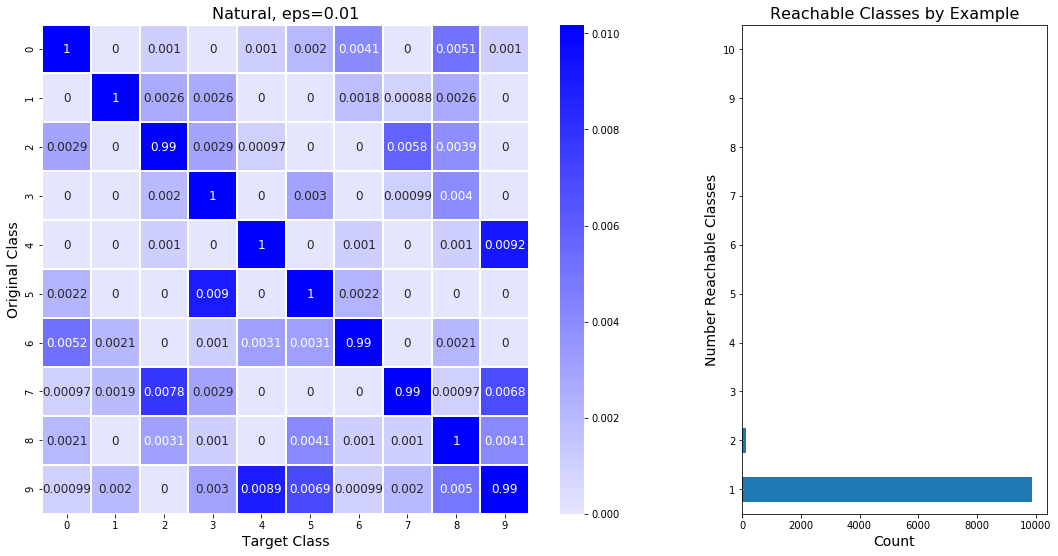

In [118]:
visualize_output(nat_01, 'Natural, eps=0.01')

90
0.0486535415252


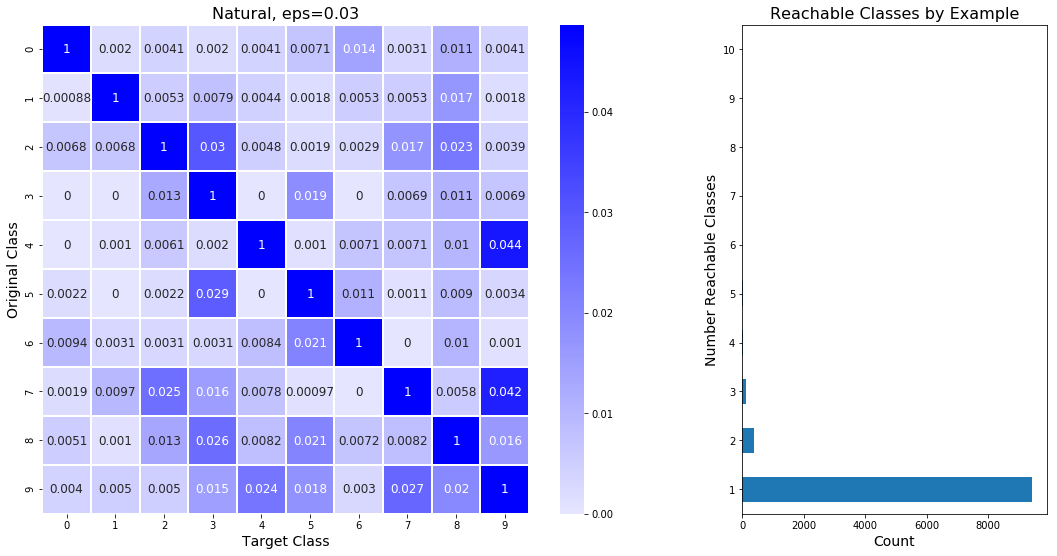

In [119]:
visualize_output(nat_03, 'Natural, eps=0.03')

84
0.929413060236


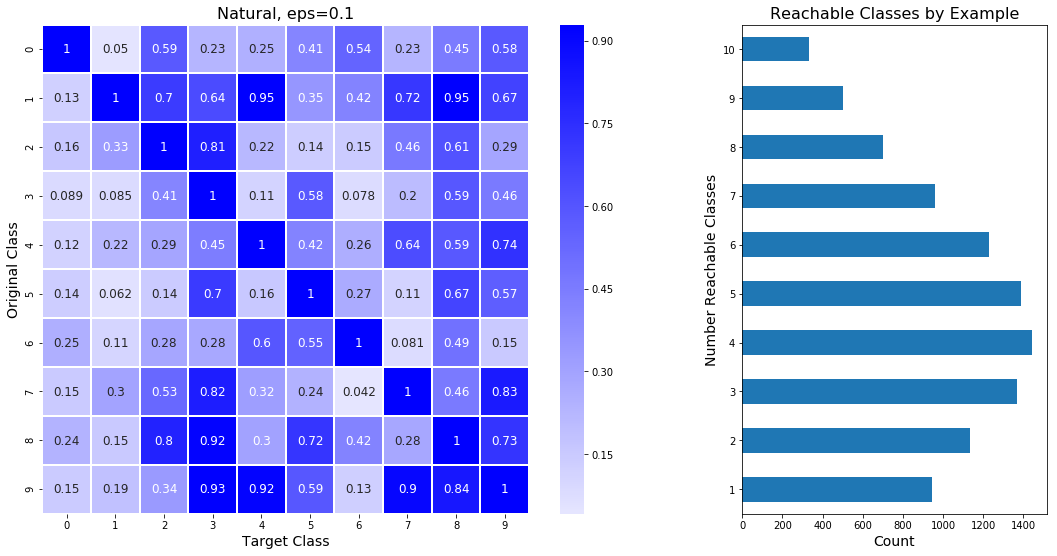

In [120]:
visualize_output(nat_1, 'Natural, eps=0.1')

0
1


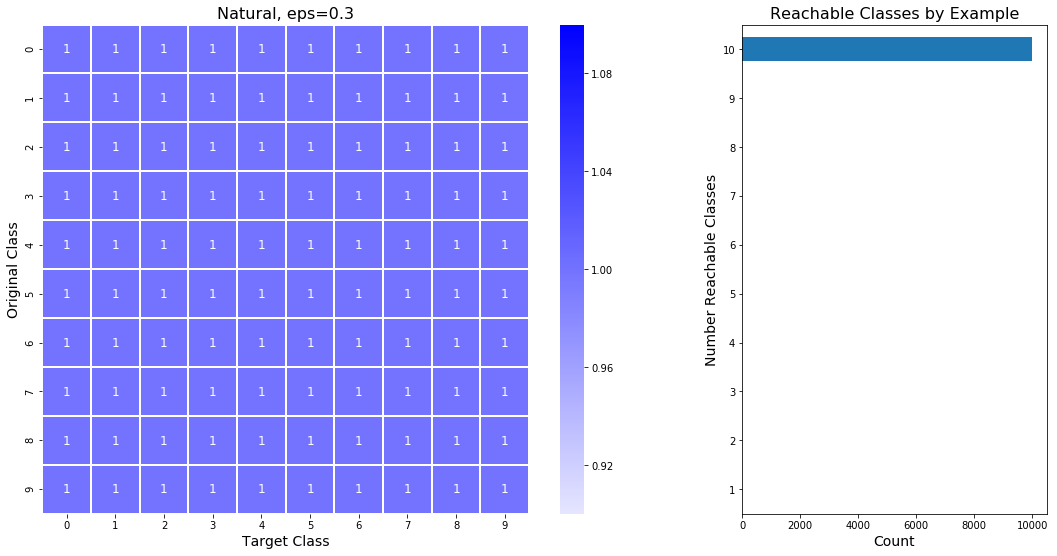

In [121]:
visualize_output(nat_3, 'Natural, eps=0.3')

In [5]:
%%capture
tf.reset_default_graph()
adv_3 = run_attack.run_class_attack_ext(ADV_MODEL_PATH, 'attacks/attack_adv_3.npy', 0.3)

INFO:tensorflow:Restoring parameters from models/adv_trained/checkpoint-99900


90
0.0599683186241


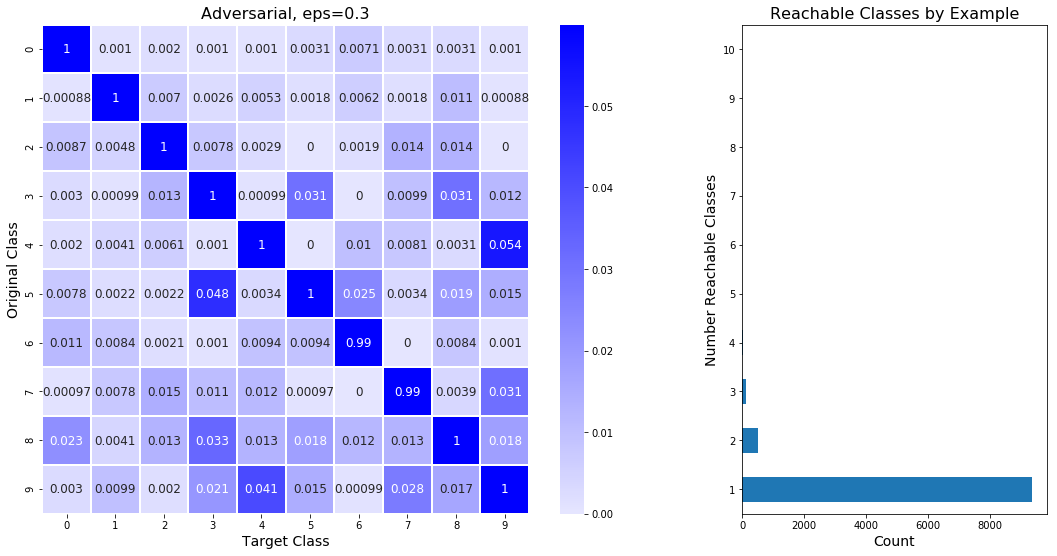

In [122]:
visualize_output(adv_3, 'Adversarial, eps=0.3')